# Neale diseases genes (Pascal) and vascular phenotypes genes (Pascal)

###### First version 17/06/2022
###### Latest modif 18/01/2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import seaborn as sns
from datetime import datetime
import os
import glob
from matplotlib.colors import LogNorm, Normalize

DATE = datetime.now().strftime("%Y-%m-%d")

In [2]:
p_value_min = 5.7  # -math.log10(0.05/len(x))
ventile_num='Zekavat'
#date_used='2022_11_23' #'2022_08_17'
#directory_genes='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_ZERO/gwas/'+str(date_used)+'_'+str(ventile_num) +'/'
directory_genes='/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/2022_11_23_covar_fix/genes_diseases/'
directory_diseases_neale_pascal = '/HDD/data/ukbb/disease_sumstats/VARIANTS/'
#'/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/'  #2022_11_23_covar_fix/'
#save_dir= '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/2022_11_23_covar_fix/genes_diseases/'

MAIN_LABELS='mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'
MAIN_NAMES='A temporal angle,V temporal angle,V tortuosity,A tortuosity,ratio tortuosity,A central retinal eq,ratio central retinal eq,A std diameter,V std diameter,V central retinal eq,ratio vascular density,A vascular density,bifurcations,V vascular density,A median diameter,V median diameter,ratio median diameter'
all_files = list(MAIN_LABELS.split(","))
all_files_new = list(MAIN_NAMES.split(","))

only_continuos = True # True, False

path = '/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/gwas/gcorr_diseases/'


### Read from csv
file_info_name='pheno_diseases_info.csv'

df_inf_csv = pd.read_csv('~/retina-phenotypes/complementary/'+ file_info_name)
print('len(df_inf_csv):', len(df_inf_csv))
df_inf_filt =  df_inf_csv[df_inf_csv['pascal_analysis']!='NOT_AVAILABLE']
print('len(df_inf_filt):', len(df_inf_filt))


if only_continuos == True:
    #df_inf_filt =  df_inf_filt[df_inf_filt['dtype'] == 'con']
    df_inf_filt = df_inf_filt[(df_inf_filt['dtype'] == 'con') | (df_inf_filt['dtype'] == 'cat')]
    print('len(df_inf_filt):', len(df_inf_filt))
    df_inf_filt = df_inf_filt[df_inf_filt['name_LR'] != 'N_cigarettes_curr_daily_both']
    df_inf_filt = df_inf_filt[df_inf_filt['subcategory'] != 'Colour']


diseases_traits_old = list(df_inf_filt['datafield'].values)
diseases_traits_new = list(df_inf_filt['final_name'].values)

len(df_inf_csv): 89
len(df_inf_filt): 74
len(df_inf_filt): 12


In [3]:

os.chdir(directory_diseases_neale_pascal)
l_diseases_all=[]


### compute df with Neale diseases' genes

list_neale_genes = df_inf_filt['Neale_gwas'] + '__gene_scores'


for file in list_neale_genes: #glob.glob("*__gene_scores"):  file.startswith('only_rs_notna_mod_variants'):
    try:
        df = pd.read_csv(directory_diseases_neale_pascal+file, delimiter='\t', names =['gen', 'p']) #, index_col=None, header=0)
        print(file)
        df['file_col']=file
        df['-log10(p)'] = -np.log10(df['p'])
        y = df[df['-log10(p)'] >= p_value_min]
        df_significant = y.sort_values('-log10(p)', ascending=False)
        pheno, b = file.split(".gwas.")
        aux, pheno_name = pheno.split("rs_notna_mod_variants_")

        data={
        'pheno':  pheno,
        'name_pheno': pheno_name,
        'N genes': len(df_significant),
        'names': df_significant['gen'].to_list()
        }
        l_diseases_all.append(data)
    except Exception:
        print('No possible to open:', file)
        continue

df_genes_neale = pd.DataFrame(l_diseases_all)

df_genes_neale


#######df_genes_neale= pd.read_csv('/SSD/home/sofia/retina-phenotypes/complementary/GWAS_postprocessing/'+neale_csv_name, converters={'names': pd.eval})

#df_genes_neale['liststring'] = [''.join(map(str, l)) for l in df_genes_neale['names']]
#df_genes_neale_red = df_genes_neale[df_genes_neale["name_pheno"].isin(list_pheno_neale)]

only_rs_notna_mod_variants_4079_irnt.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_4080_irnt.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_102_irnt.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_21021_irnt.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_30760_irnt.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_30780_irnt.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_30870_irnt.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_30750_irnt.gwas.imputed_v3.both_sexes.varorder.tsv__gene_scores
only_rs_notna_mod_variants_1558.gwas.imputed_v3.both_sexes.tsv__gene_scores
only_rs_notna_mod_variants_21001_irnt.gwas.imputed_v3.both_sexes.tsv__gene_scores


,pheno,name_pheno,N genes,names
0,only_rs_notna_mod_variants_4079_irnt,4079_irnt,910,"[CSK, RP1-278O22.1, LMAN1L, CYP1A2, CPLX3, ULK..."
1,only_rs_notna_mod_variants_4080_irnt,4080_irnt,959,"[NPPA, NPPB, MTHFR, CLCN6, C1orf167, NPR3, AGT..."
2,only_rs_notna_mod_variants_102_irnt,102_irnt,907,"[MYH6, CMTM5, IL25, EFS, KIAA1755, MYH7, SLC22..."
3,only_rs_notna_mod_variants_21021_irnt,21021_irnt,3,"[PALM, TEX41, PRSS57]"
4,only_rs_notna_mod_variants_30760_irnt,30760_irnt,939,"[GALNT2, FEN1, TMEM258, FADS1, MYRF, FADS2, IN..."
5,only_rs_notna_mod_variants_30780_irnt,30780_irnt,921,"[APOC1, BCAM, APOB, TOMM40, TDRD15, APOE, RP11..."
6,only_rs_notna_mod_variants_30870_irnt,30870_irnt,1399,"[LPL, TBL2, AL138847.1, ANGPTL3, USP1, FZD9, D..."
7,only_rs_notna_mod_variants_30750_irnt,30750_irnt,2078,"[ABCB11, G6PC2, SPC25, HK1, OR10Z1, SPTA1, HIS..."
8,only_rs_notna_mod_variants_1558,1558,276,"[AC109829.1, ADH7, KLB, NPIPB8, SULT1A1, CCDC1..."
9,only_rs_notna_mod_variants_21001_irnt,21001_irnt,1567,"[FTO, RP11-795H16.3, TMEM18, AC093326.3, ADCY3..."


In [4]:
### DELETE raws and delete '_irnt' (JUST IN CASE)
df_genes_neale=df_genes_neale[df_genes_neale['name_pheno'].str.endswith('_raw') == False]
df_genes_neale['name_pheno'] = df_genes_neale['name_pheno'].str.replace('_irnt', '')
df_genes_neale

,pheno,name_pheno,N genes,names
0,only_rs_notna_mod_variants_4079_irnt,4079,910,"[CSK, RP1-278O22.1, LMAN1L, CYP1A2, CPLX3, ULK..."
1,only_rs_notna_mod_variants_4080_irnt,4080,959,"[NPPA, NPPB, MTHFR, CLCN6, C1orf167, NPR3, AGT..."
2,only_rs_notna_mod_variants_102_irnt,102,907,"[MYH6, CMTM5, IL25, EFS, KIAA1755, MYH7, SLC22..."
3,only_rs_notna_mod_variants_21021_irnt,21021,3,"[PALM, TEX41, PRSS57]"
4,only_rs_notna_mod_variants_30760_irnt,30760,939,"[GALNT2, FEN1, TMEM258, FADS1, MYRF, FADS2, IN..."
5,only_rs_notna_mod_variants_30780_irnt,30780,921,"[APOC1, BCAM, APOB, TOMM40, TDRD15, APOE, RP11..."
6,only_rs_notna_mod_variants_30870_irnt,30870,1399,"[LPL, TBL2, AL138847.1, ANGPTL3, USP1, FZD9, D..."
7,only_rs_notna_mod_variants_30750_irnt,30750,2078,"[ABCB11, G6PC2, SPC25, HK1, OR10Z1, SPTA1, HIS..."
8,only_rs_notna_mod_variants_1558,1558,276,"[AC109829.1, ADH7, KLB, NPIPB8, SULT1A1, CCDC1..."
9,only_rs_notna_mod_variants_21001_irnt,21001,1567,"[FTO, RP11-795H16.3, TMEM18, AC093326.3, ADCY3..."


In [5]:
#df_genes_neale.to_csv('/SSD/home/sofia/2023_06_08_genes_neale_risk.csv')

In [5]:
df_aux=pd.DataFrame([])
l_diseases_intersection= []
df_file_form=pd.DataFrame(columns=all_files, index = list(df_genes_neale['name_pheno']))
j=-1
for file in all_files:
    j=j+1
    # Read csvs
    df = pd.read_csv(directory_genes+file+'__gene_scores', delimiter='\t', names =['gen', 'p']) #, index_col=None, header=0)
    df['file_col']=file

    # From p to -log10(p)
    df['-log10(p)'] = -np.log10(df['p'])
    y = df[df['-log10(p)'] >= p_value_min]
    df_significant = y.sort_values('-log10(p)', ascending=False)
    #phenotype_genes=df_significant['gen'].to_list()
    set_pheno=set(df_significant['gen'])
    print(file)
    for i in range(len(df_genes_neale)):
        if len(df_genes_neale['names'].iloc[i]) !=0: 
            set_neale=set(df_genes_neale['names'].iloc[i])
           # print(file, df_genes_neale['name_pheno'].iloc[i])
            print(df_genes_neale['name_pheno'].iloc[i], len(set_neale),len(set_pheno & set_neale))
            #print(len(set_pheno), len(set_neale),len(set_pheno & set_neale))
            #print('Num of genes in pheno, neale, intersection: ',len(set_pheno), len(set_neale),len(set_pheno & set_neale))
            #print('Name of the genes intersection: ', set_pheno & set_neale, '\n')
            df_file_form.iloc[i][j]=len(set_pheno & set_neale) ## RELEVANT ONE
            
            data_intersection={
            'name_pheno': file,
            'name_disease':  df_genes_neale['name_pheno'].iloc[i],
            'len(set_neale)': len(set_neale),
            'len(set_pheno_set_neale)': len(set_pheno & set_neale),
            'name_genes_inters': set_pheno & set_neale
            }
            l_diseases_intersection.append(data_intersection)
        else:
            continue
        #df_data_intersection=pd.DataFrame(data_intersection)

    print('\n')
#print(l_diseases_intersection)
df_genes_neale_intersection = pd.DataFrame(l_diseases_intersection)
    

mean_angle_taa
4079 910 1
4080 959 0
102 907 2
21021 3 0
30760 939 0
30780 921 0
30870 1399 2
30750 2078 2
1558 276 1
21001 1567 3


mean_angle_tva
4079 910 1
4080 959 0
102 907 2
21021 3 0
30760 939 0
30780 921 0
30870 1399 0
30750 2078 0
1558 276 1
21001 1567 2


tau1_vein
4079 910 15
4080 959 15
102 907 22
21021 3 0
30760 939 17
30780 921 16
30870 1399 16
30750 2078 34
1558 276 0
21001 1567 15


tau1_artery
4079 910 34
4080 959 26
102 907 17
21021 3 0
30760 939 30
30780 921 32
30870 1399 17
30750 2078 49
1558 276 0
21001 1567 23


ratio_AV_DF
4079 910 6
4080 959 13
102 907 6
21021 3 0
30760 939 15
30780 921 2
30870 1399 1
30750 2078 16
1558 276 0
21001 1567 15


eq_CRAE
4079 910 0
4080 959 2
102 907 14
21021 3 0
30760 939 0
30780 921 0
30870 1399 1
30750 2078 12
1558 276 1
21001 1567 2


ratio_CRAE_CRVE
4079 910 8
4080 959 9
102 907 0
21021 3 0
30760 939 0
30780 921 18
30870 1399 18
30750 2078 9
1558 276 10
21001 1567 4


D_A_std
4079 910 1
4080 959 2
102 907 9
21021 3 0
30760 939 0

In [6]:

df_file_form_2 = df_file_form.dropna()

df_file_form_2 = df_file_form_2.T
#df_file_proper_format.dtypes
df_file_form_2= df_file_form_2.astype(np.int64)

def rename_col_index(df, l_diseases_old, l_diseases_new, l_phenos_old, l_phenos_new):
    df.rename(index=dict(zip(l_phenos_old, l_phenos_new)), inplace=True)
    df.rename(columns=dict(zip(l_diseases_old, l_diseases_new)), inplace=True)
    return df

df_file_form_2= rename_col_index(df_file_form_2, diseases_traits_old, diseases_traits_new, all_files, all_files_new)
#df_file_form_2[[list(diseases_traits.values())]]


# Figure 1

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5]),
 [Text(0.5, 0, 'A temporal angle'),
  Text(1.5, 0, 'V temporal angle'),
  Text(2.5, 0, 'V tortuosity'),
  Text(3.5, 0, 'A tortuosity'),
  Text(4.5, 0, 'ratio tortuosity'),
  Text(5.5, 0, 'A central retinal eq'),
  Text(6.5, 0, 'ratio central retinal eq'),
  Text(7.5, 0, 'A std diameter'),
  Text(8.5, 0, 'V std diameter'),
  Text(9.5, 0, 'V central retinal eq'),
  Text(10.5, 0, 'ratio vascular density'),
  Text(11.5, 0, 'A vascular density'),
  Text(12.5, 0, 'bifurcations'),
  Text(13.5, 0, 'V vascular density'),
  Text(14.5, 0, 'A median diameter'),
  Text(15.5, 0, 'V median diameter'),
  Text(16.5, 0, 'ratio median diameter')])

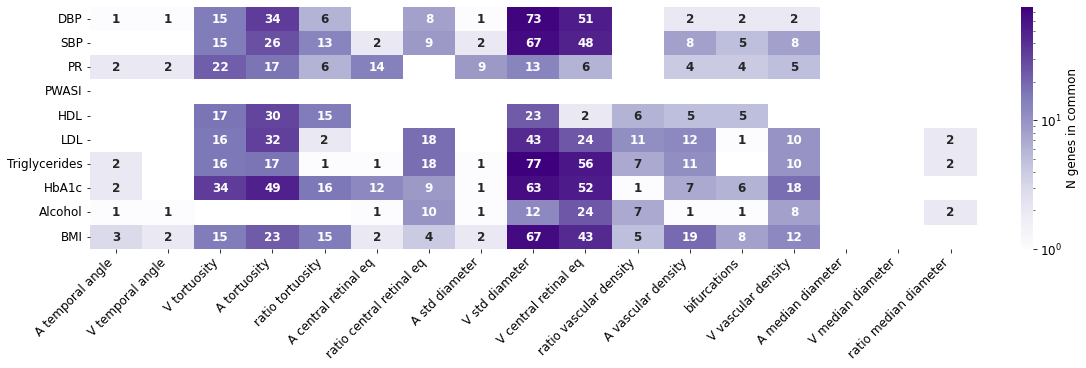

In [8]:
plt.rcParams['font.size'] = '12'
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['figure.constrained_layout.use'] = True

if only_continuos == True:
    figsize_val_2=(15, 5)
else:
    figsize_val_2=(15, 15)

df_file_proper_format_plots = df_file_form_2 #[list(diseases_traits_old)]
fig, ax = plt.subplots(figsize=figsize_val_2)

## delte pulse wave asi because there are no genes
#df_file_proper_format_plots = df_file_proper_format_plots.drop(columns=['Pulse wave ASI'])

fig1 = sns.heatmap(df_file_proper_format_plots.T, annot=True, fmt=".0f", cbar=True, 
             annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_file_proper_format_plots.T).min().max(), 
            vmax=abs(df_file_proper_format_plots.T).max().max(),  #YlGnBu
            cmap='Purples',alpha=1.0, cbar_kws={'label': 'N genes in common'}, 
            norm=LogNorm())
plt.xticks(rotation=45, ha='right')

# Figura Pascal and PascalX

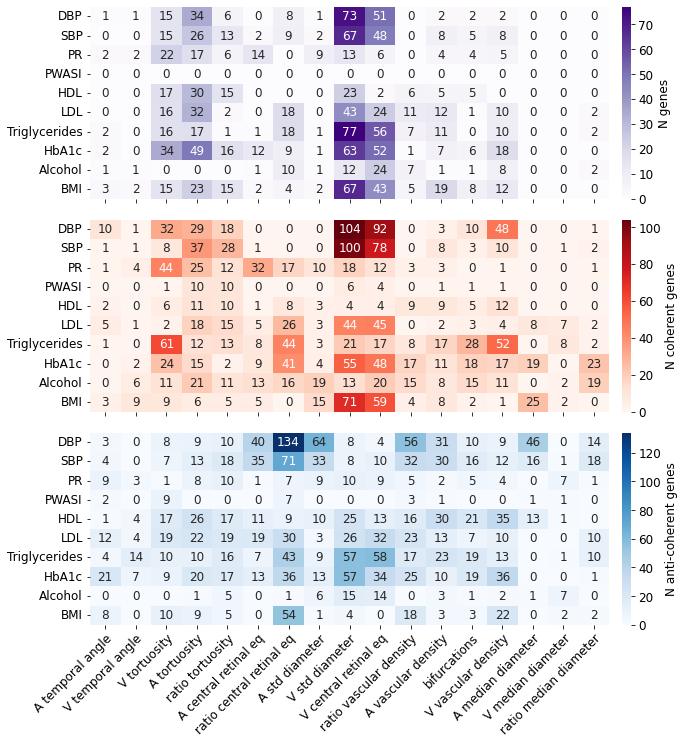

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LogNorm
import seaborn as sns
import pickle
import os.path

def get_xscorer_nbgenes(gwasA, gwasB, crossDir):
    # Get xscorer nb of coherent and anti-coherent genes
    if os.path.exists(f'{crossDir}{gwasA}__{gwasB}__coherence__xscorer_results.csv'):
        cohe_path = f'{crossDir}{gwasA}__{gwasB}__coherence__xscorer_results.csv'
        anti_path = f'{crossDir}{gwasA}__{gwasB}__anti-coherence__xscorer_results.csv'
    else:
        cohe_path = f'{crossDir}{gwasB}__{gwasA}__coherence__xscorer_results.csv'
        anti_path = f'{crossDir}{gwasB}__{gwasA}__anti-coherence__xscorer_results.csv'
    cohe = pd.read_csv(cohe_path)
    anti = pd.read_csv(anti_path)
    Bonf_thre = 0.05 / cohe.shape[0]
    cohe_nb = len(cohe.loc[cohe['pval']<(Bonf_thre)])
    anti_nb = len(anti.loc[anti['pval']<(Bonf_thre)])
    return cohe_nb, anti_nb

def xscorer_nbgenes_heatmaps2(listA, listB, labelsA, labelsB, crossDir, show, export, outname, df_file_proper_format_plots):
    # Heatmaps with number of coherent and anti-coherent genes
    # Coloured by number of genes (coherent red, anti-coherent blue)
    cohe_table = pd.DataFrame(index=listB, columns=listA)
    anti_table = pd.DataFrame(index=listB, columns=listA)
    for gwasA in listA:
        for gwasB in listB:
            cohe_nb, anti_nb = get_xscorer_nbgenes(gwasA, gwasB, crossDir)
            cohe_table.loc[gwasB, gwasA] = cohe_nb
            anti_table.loc[gwasB, gwasA] = anti_nb

    cohe_table = cohe_table.apply(pd.to_numeric)
    anti_table = anti_table.apply(pd.to_numeric)

    # Heatmaps
    plt.rcParams['figure.constrained_layout.use'] = False
    if len(listB) <= 10:
        fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(len(listA) * 0.6, (len(listB) * 0.35) * 3), sharex=True)
    else:
        fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(len(listA) * 0.6, (len(listB) * 0.35) * 3))

        # Heatmaps (continued)
    sns.heatmap(df_file_proper_format_plots.T, ax=ax[0], annot=True, fmt='g', cbar=True,
                cmap='Purples', cbar_kws={'pad':0.02, 'label': 'N genes'})

    sns.heatmap(cohe_table, annot=True, fmt='g', cmap='Reds', ax=ax[1], cbar_kws={'pad':0.02, 'label':'N coherent genes'})
    sns.heatmap(anti_table, annot=True, fmt='g', cmap='Blues', ax=ax[2], cbar_kws={'pad':0.02, 'label':'N anti-coherent genes'})
    
    # Adjust tick labels
    ax[1].set_xticklabels(labelsA, rotation=45, ha='right', rotation_mode='anchor')
    ax[2].set_xticklabels(labelsA, rotation=45, ha='right', rotation_mode='anchor')

    # Add additional tick locations and labels
    ax[1].set_yticks(np.arange(len(listB))+0.5)
    ax[1].set_yticklabels(labelsB)
    ax[2].set_yticks(np.arange(len(listB))+0.5)
    ax[2].set_yticklabels(labelsB)

    plt.tight_layout()
    if show:
        plt.show()
    else:
        plt.close()
    if export:
        fig.savefig('/SSD/home/sofia/' + outname + '.jpg', dpi=300, format='jpg', bbox_inches='tight', pad_inches=0.1)

# Rest of the code...

traits = 'mean_angle_taa,mean_angle_tva,tau1_vein,tau1_artery,ratio_AV_DF,eq_CRAE,ratio_CRAE_CRVE,D_A_std,D_V_std,eq_CRVE,ratio_VD,VD_orig_artery,bifurcations,VD_orig_vein,medianDiameter_artery,medianDiameter_vein,ratio_AV_medianDiameter'.split(',')
with open('/NVME/decrypted/scratch/multitrait/UK_BIOBANK_PREPRINT/participant_phenotype/PC__2022_11_23_covar_fix__labels_order.csv', 'r') as f:
    for r in f:  # there's only one row
        order = [int(i) for i in r.split(',')]

traits = [traits[i] for i in order]

diseases = ['4079_irnt', '4080_irnt', '102_irnt', '21021_irnt', '30760_irnt', '30780_irnt', '30870_irnt', '30750_irnt', '1558', '21001_irnt']
labelsA = ['A temporal angle','V temporal angle','V tortuosity','A tortuosity','ratio tortuosity','A central retinal eq','ratio central retinal eq','A std diameter','V std diameter','V central retinal eq','ratio vascular density','A vascular density','bifurcations','V vascular density','A median diameter','V median diameter','ratio median diameter']
labelsB = ['DBP', 'SBP', 'PR', 'PWASI', 'HDL', 'LDL', 'Triglycerides', 'HbA1c', 'Alcohol', 'BMI']
crossDir_ret_dis = '/NVME/scratch/olga/output/PascalX/xscorer/retina-disease/2023-02-13/'
show = True
export=True
outname_ret_dis = 'plane_xscorer_retina_disease_cohe_anticohe_heatmaps'
xscorer_nbgenes_heatmaps2(traits, diseases, labelsA, labelsB, crossDir_ret_dis, show, export, outname_ret_dis, df_file_proper_format_plots)



# Figure 2

In [ ]:
df_file_proper_format_plots = df_file_form_2 #[list(diseases_traits_old)]

### filter by continuos and binary:
df_con_auxiliar_plot =  df_inf_csv[df_inf_csv['dtype'] == 'con']
list_continuous_inter=set(list(df_con_auxiliar_plot['final_name']))&set(list(df_file_proper_format_plots.columns))

df_bin_auxiliar_plot = df_inf_csv[df_inf_csv['dtype'] == 'bin']
df_cat_auxiliar_plot = df_inf_csv[df_inf_csv['dtype'] == 'cat']
list_cat_bin_inter = set(list(df_bin_auxiliar_plot['final_name']) + list(df_cat_auxiliar_plot['final_name']))&set(list(df_file_proper_format_plots.columns))

df_file_proper_format_plots_con = df_file_proper_format_plots[list_continuous_inter]
df_file_proper_format_plots_bin_cat = df_file_proper_format_plots[list_cat_bin_inter]

In [ ]:
f = plt.figure()
cte_fig=1.5
figsize_val=(10*cte_fig, 8*cte_fig)
f, (ax1, ax2) = plt.subplots(2, 1, figsize=figsize_val, gridspec_kw={'height_ratios': [len(df_file_proper_format_plots_con.T), len(df_file_proper_format_plots_bin_cat.T)]})




plt.rcParams['figure.constrained_layout.use'] = True
plt.rcParams['font.size'] = '12'

fig1 = sns.heatmap(df_file_proper_format_plots_con.T, annot=True, fmt=".0f", cbar=True, 
            annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_file_proper_format_plots_con.T).min().max(), 
            vmax=abs(df_file_proper_format_plots_con.T).max().max(),  #YlGnBu
            cmap='Purples',alpha=1.0, cbar_kws={'label': 'N genes in common'}, 
            norm=LogNorm(), ax=ax1)
fig1.set_xticklabels(ax1.get_xticklabels(), rotation = 45, ha='right', visible=False)


fig2 = sns.heatmap(df_file_proper_format_plots_bin_cat.T, annot=True, fmt=".0f", cbar=True, 
             annot_kws={'weight': 'bold'}, 
            vmin=-abs(df_file_proper_format_plots_bin_cat.T).min().max(), 
            vmax=abs(df_file_proper_format_plots_bin_cat.T).max().max(),  #YlGnBu
            cmap='Purples',alpha=1.0, cbar_kws={'label': 'N genes in common'}, 
            norm=LogNorm(), ax=ax2)
fig2.set_xticklabels(ax2.get_xticklabels(), rotation = 45, ha='right')


In [ ]:
print(df_genes_neale_intersection.columns)
for i in range(len(df_genes_neale_intersection)):
    print( df_genes_neale_intersection['name_pheno'].iloc[i], df_genes_neale_intersection['name_disease'].iloc[i], df_genes_neale_intersection['name_genes_inters'].iloc[i])


# 6150_2 = angina -> LINC00461
# 6150_1 = Heart attack  -> COL4A1, ARIH2OS, SH2B3, 'ATXN2'
#Glaucoma *,6148_2 -> 'SIX6', 'RP11-1042B17.5', 'C14orf39', 'SIX1'

In [ ]:
#df_genes_neale_intersection['len(set_pheno_set_neale)']
# plot a bar chart
sns.barplot(
    x="len(set_pheno_set_neale)", 
    y="name_disease", 
    data=df_genes_neale_intersection, 
    ci=None, 
    color='#69b3a2');

In [ ]:
#df_genes_count[df_genes_count['Unnamed: 0']=='CTD-2008P7.9']